PROCESO DE ETL DEL DATASET BRINDADO POR SOY HENRY EN EL REPOSITORIO DE GUIA

In [1]:
# Importo las librerías necesarias para el procesamiento de los datos. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

In [2]:
# Carga del dataset brindado
df = pd.read_csv('AccidentesAviones.csv', sep= ',')

In [3]:
df.shape

(5008, 18)

In [5]:
df.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [6]:
df.tail(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [7]:
df.iloc[:,0:9].head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?


In [8]:
df.iloc[:, 9:18].head(3)

,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [9]:
df.columns

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [10]:
# Descripción general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [3]:
# Eliminación de la columna "Unnamed"
df = df.drop('Unnamed: 0', axis=1)


In [69]:
significado_variables = {'fecha': 'Fecha del accidente',
                         'HORA declarada': 'Hora local del accidente',
                         'Ruta': 'Aeropuerto de salida',
                         'OperadOR': 'Linea aerea u operador de la aeronave',
                         'flight_no': 'Número de vuelo asignado por el operador',
                         'route': 'Ruta completa o parcial volada antes del accidente',
                         'ac_type': 'Tipo de aeronave',
                         'registration': 'Matricula OACI de la aeronave',
                         'cn_ln': 'Construcción o número de serie',
                         'all_aboard': 'Total de personas a bordo, incluidos pasajeros y tripulación',
                         'PASAJEROS A BORDO': 'Total de pasajeros a bordo',
                         'crew_aboard': 'Total de tripulantes a bordo',
                         'cantidad de fallecidos': 'Total de fallecidos',
                         'passenger_fatalities': 'Pasajeros fallecidos',
                         'crew_fatalities': 'Tripulantes fallecidos',
                         'ground': 'Fallecidos en tierra',
                         'summary': 'Descripcion breve del suceso'}

In [70]:
significado_variables

{'fecha': 'Fecha del accidente',
 'HORA declarada': 'Hora local del accidente',
 'Ruta': 'Aeropuerto de salida',
 'OperadOR': 'Linea aerea u operador de la aeronave',
 'flight_no': 'Número de vuelo asignado por el operador',
 'route': 'Ruta completa o parcial volada antes del accidente',
 'ac_type': 'Tipo de aeronave',
 'registration': 'Matricula OACI de la aeronave',
 'cn_ln': 'Construcción o número de serie',
 'all_aboard': 'Total de personas a bordo, incluidos pasajeros y tripulación',
 'PASAJEROS A BORDO': 'Total de pasajeros a bordo',
 'crew_aboard': 'Total de tripulantes a bordo',
 'cantidad de fallecidos': 'Total de fallecidos',
 'passenger_fatalities': 'Pasajeros fallecidos',
 'crew_fatalities': 'Tripulantes fallecidos',
 'ground': 'Fallecidos en tierra',
 'summary': 'Descripcion breve del suceso'}

In [4]:
# Definición de una función para reemplazar registros que sólo puedan contener cadenas vacías o el caracter '?' por valores nulos
def reemplazar_valores_vacios(df):
    df.replace(['', '?'], np.nan, inplace=True)
    return df

In [5]:
# Reemplazo de los valores en el dataframe
df = reemplazar_valores_vacios(df)

In [16]:
df.head()

,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   fecha                   5008 non-null   object
 1   HORA declarada          3504 non-null   object
 2   Ruta                    5003 non-null   object
 3   OperadOR                4998 non-null   object
 4   flight_no               1326 non-null   object
 5   route                   4245 non-null   object
 6   ac_type                 4995 non-null   object
 7   registration            4736 non-null   object
 8   cn_ln                   4341 non-null   object
 9   all_aboard              4991 non-null   object
 10  PASAJEROS A BORDO       4787 non-null   object
 11  crew_aboard             4789 non-null   object
 12  cantidad de fallecidos  5000 non-null   object
 13  passenger_fatalities    4773 non-null   object
 14  crew_fatalities         4773 non-null   object
 15  grou

In [47]:
# Descripción de los valores nulos por variable
df.isnull().sum()

fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                     59
dtype: int64

In [73]:
total_nulos = df.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
datos_faltantes = pd.concat([total_nulos, porcentaje_nulos], axis=1, keys=['Total', 'Porcentaje'])
print( 'Los datos faltantes del dataframe son:', '\n',
      total_nulos, '\n',
      'El porcentaje de datos faltantes del dataframe es:', '\n',
      datos_faltantes[datos_faltantes['Total']>0], sep = '\n')

Los datos faltantes del dataframe son:


flight_no                 3682
HORA declarada            1504
route                      763
cn_ln                      667
registration               272
crew_fatalities            235
passenger_fatalities       235
PASAJEROS A BORDO          221
crew_aboard                219
summary                     59
ground                      44
all_aboard                  17
ac_type                     13
OperadOR                    10
cantidad de fallecidos       8
Ruta                         5
fecha                        0
dtype: int64


El porcentaje de datos faltantes del dataframe es:


                        Total  Porcentaje
flight_no                3682    0.735224
HORA declarada           1504    0.300319
route                     763    0.152356
cn_ln                     667    0.133187
registration              272    0.054313
crew_fatalities           235    0.046925
passenger_fatalities      235    0.046925
PASAJEROS A BORDO         22

In [6]:
# conversión del tipo de variables objetc a numérica int que representan cantidades numéricas discretas y datatime en el caso de columna fecha.
columnas_numericas = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

df[columnas_numericas] = df[columnas_numericas].apply(pd.to_numeric, errors='coerce').fillna(pd.NA).astype(pd.Int64Dtype())

df[columnas_numericas] = df[columnas_numericas].fillna(df[columnas_numericas].median())


In [7]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          3504 non-null   object        
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   flight_no               1326 non-null   object        
 5   route                   4245 non-null   object        
 6   ac_type                 4995 non-null   object        
 7   registration            4736 non-null   object        
 8   cn_ln                   4341 non-null   object        
 9   all_aboard              5008 non-null   Int64         
 10  PASAJEROS A BORDO       5008 non-null   Int64         
 11  crew_aboard             5008 non-null   Int64         
 12  cantidad de fallecidos  5008 non-null   Int64   

In [9]:
df.isnull().sum()

fecha                        0
HORA declarada            1504
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                   0
PASAJEROS A BORDO            0
crew_aboard                  0
cantidad de fallecidos       0
passenger_fatalities         0
crew_fatalities              0
ground                       0
summary                     59
dtype: int64

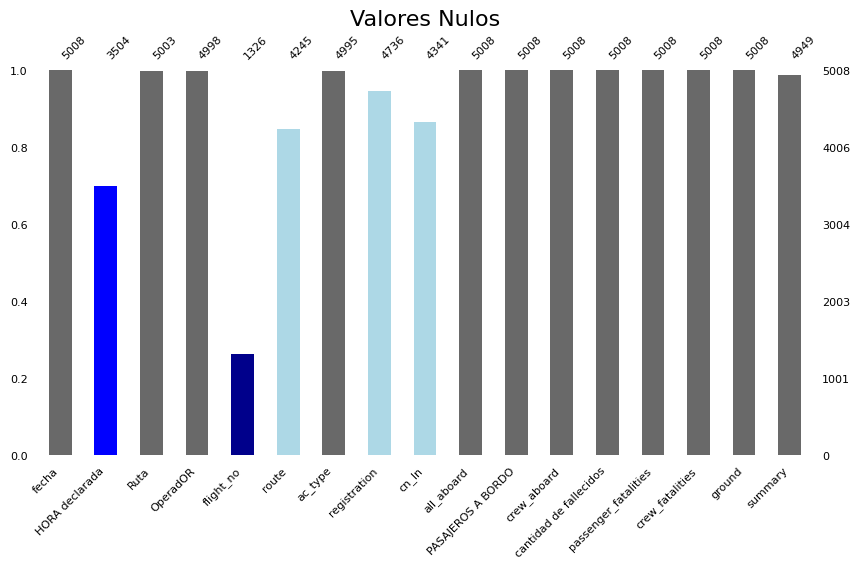

In [53]:
# Visualización de los valores nulos del dataframe
import missingno 
color = ['dimgrey', 'blue', 'dimgrey', 'dimgrey', 'darkblue', 'lightblue', 'dimgrey', 'lightblue', 'lightblue', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey', 'dimgrey']
missingno.bar(df, fontsize= 8, color= color, figsize= (10,5))
plt.title('Valores Nulos', fontsize= 16)
plt.show()

In [10]:
# Selección de las variables con las cuales voy a trabajar en el Análisis Exploratorio de los Datos 
df = df[['fecha', 'Ruta', 'OperadOR', 'ac_type', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary']]

In [55]:
df.head(3)

,fecha,Ruta,OperadOR,ac_type,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,"Juvisy-sur-Orge, France",NaN,Wright Byplane,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


In [56]:
df.tail(3)

,fecha,Ruta,OperadOR,ac_type,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5005,2021-06-10,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,Beechcraft 1900D,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,"Patikul, Sulu, Philippines",Military - Philippine Air Force,Lockheed C-130H Hercules,96,88,8,50,7,3,3,"While attempting to land at Jolo Airport, the ..."
5007,2021-07-06,"Palana, Russia",Kamchatka Aviation Enterprise,Antonov An 26B-100,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


In [11]:
df.isnull().sum()

fecha                      0
Ruta                       5
OperadOR                  10
ac_type                   13
all_aboard                 0
PASAJEROS A BORDO          0
crew_aboard                0
cantidad de fallecidos     0
passenger_fatalities       0
crew_fatalities            0
ground                     0
summary                   59
dtype: int64

In [12]:
# Eliminación de los valores nulos resultantes 
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

fecha                     0
Ruta                      0
OperadOR                  0
ac_type                   0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64

In [14]:
# Eliminación de posibles valores duplicados 
df.duplicated().unique()

array([False])

In [15]:
# Aignación de nuevos nombres a las variables
nombres = {'fecha': 'Fecha', 'Ruta': 'Aeropuerto_Salida', 'OperadOR': 'Operador', 'ac_type': 'Tipo_Aeronave', 'all_aboard': 'Total_a_Bordo', ' PASAJEROS A BORDO': 'Pasajeros_a_Bordo', 'crew_aboard': 'Tripulacion_a_Bordo', 'cantidad de fallecidos': 'Fallecidos_Totales', 'passenger_fatalities': 'Fallecidos_Pasajeros','crew_fatalities': 'Fallecidos_Tripulacion', 'ground': 'Victimas_Tierra', 'summary': 'Resumen'}

In [16]:
def renombrar_columnas(df, nombres):
    df = df.rename(columns=nombres)
    return df

In [17]:
df = renombrar_columnas(df, nombres)

In [18]:
df.columns

Index(['Fecha', 'Aeropuerto_Salida', 'Operador', 'Tipo_Aeronave',
       'Total_a_Bordo', 'PASAJEROS A BORDO', 'Tripulacion_a_Bordo',
       'Fallecidos_Totales', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulacion',
       'Victimas_Tierra', 'Resumen'],
      dtype='object')

In [19]:
df = df.rename(columns={'PASAJEROS A BORDO': 'Pasajeros_a_Bordo'})

In [20]:
df.columns

Index(['Fecha', 'Aeropuerto_Salida', 'Operador', 'Tipo_Aeronave',
       'Total_a_Bordo', 'Pasajeros_a_Bordo', 'Tripulacion_a_Bordo',
       'Fallecidos_Totales', 'Fallecidos_Pasajeros', 'Fallecidos_Tripulacion',
       'Victimas_Tierra', 'Resumen'],
      dtype='object')

In [21]:
# Exporto el nuevo dataframe con los datos procesados para realizar el análisis EDA en un nuevo archivo formato csv.
df.to_csv('Accident_Aereos.csv', index=False)